In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from qiime2 import Artifact


%matplotlib inline

# Add psuedocount

>! qiime composition add-pseudocount \
--i-table Data/tax-6-table.qza \
--o-composition-table Data/tax-6-psuedo-table.qza

# ANCOM
## IBS

>! qiime composition ancom \
--i-table Data/tax-6-psuedo-table.qza \
--m-metadata-file Data/IBS-metadata.txt \
--m-metadata-column IBS \
--o-visualization ANCOM-res/L6-IBS.qzv

#### Results:

- Identified one differentially abundant taxon: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospiraceae_ND3007_group W= 42

In [2]:
tax = Artifact.load("Data/tax-6-table.qza").view(pd.DataFrame)

#Convert to relative abundance
tax_mat = np.matrix(tax)
tax_mat /= np.sum(tax_mat, axis=1)

tax = pd.DataFrame(tax_mat,
                   index=tax.index,
                   columns=tax.columns)

<AxesSubplot: >

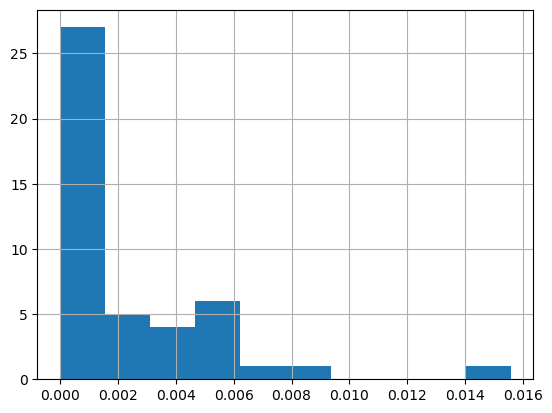

In [3]:
tax["d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospiraceae_ND3007_group"].hist()

In [4]:
metadata = pd.read_csv("Data/IBS-metadata.txt", sep="\t", index_col="Sampleid")

/var/folders/ch/dkqxfrp5559f195shx67mp7r0000gn/T/ipykernel_79755/3565131737.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize="large")


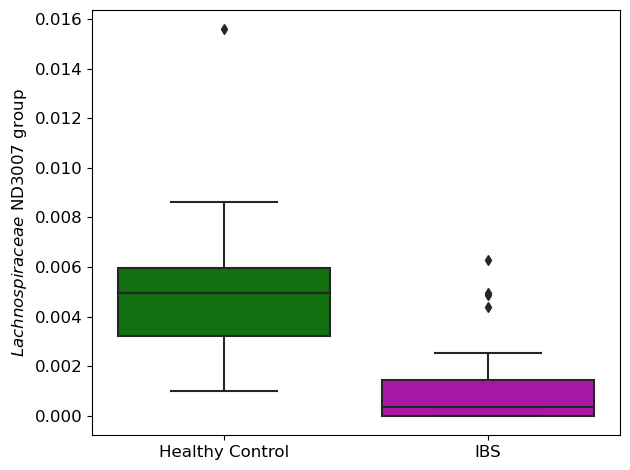

In [5]:
ax = sns.boxplot(x=metadata["IBS"].apply(lambda x: "IBS" if x=="Y" else "Healthy Control"),
                y=tax["d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnospiraceae_ND3007_group"],
                palette=["g","m"])

ax.set_ylabel(r"$Lachnospiraceae$ ND3007 group", fontsize="large")
ax.set_yticklabels(ax.get_yticklabels(), fontsize="large")
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), fontsize="large")
plt.tight_layout()
plt.savefig("Figures/ANCOM-Lachnospiraceae.pdf")
plt.show()

## IBS Type

>! qiime composition ancom \
--i-table Data/tax-6-psuedo-table.qza \
--m-metadata-file Data/IBS-metadata-ancom.txt \
--m-metadata-column IBS-Type \
--o-visualization ANCOM-res/L6-IBStype.qzv

#### Results:
- Identified one differentially abundant taxon: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eisenbergiella	W = 150

/var/folders/ch/dkqxfrp5559f195shx67mp7r0000gn/T/ipykernel_79755/1659652807.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize="large")


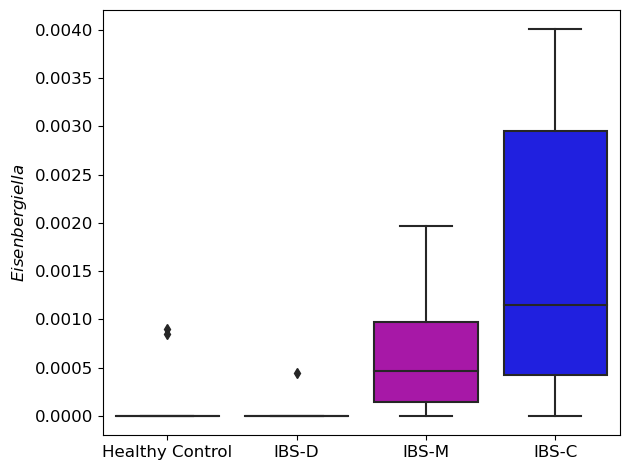

In [6]:
ax = sns.boxplot(x=metadata["IBS Type"],
                y=tax["d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eisenbergiella"],
                order=["control","IBS-D","IBS-M","IBS-C"],
                palette=["g","r","m","b"])

ax.set_ylabel(r"$Eisenbergiella$", fontsize="large")
ax.set_yticklabels(ax.get_yticklabels(), fontsize="large")
ax.set_xlabel("")
ax.set_xticklabels(["Healthy Control","IBS-D","IBS-M","IBS-C"], fontsize="large")
plt.tight_layout()
plt.savefig("Figures/ANCOM-Eisenbergiella.pdf")
plt.show()

## High fructose corn syrup

In [7]:
from skbio.stats.composition import ancom

In [8]:
ptax = Artifact.load("Data/tax-6-psuedo-table.qza").view(pd.DataFrame)

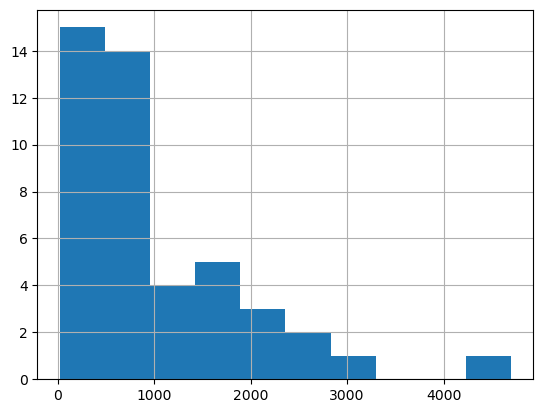

In [9]:
metadata["TOTAL EST HFCS (per month in grams)"].hist()
plt.show()

**It looks like there's a group that has < 1000, and then another group > 1000**

In [13]:
metadata["HFCS/month > 1000"] = metadata["TOTAL EST HFCS (per month in grams)"].apply(lambda x: "High" if x>1000 else "Low")

In [14]:
sum(metadata["HFCS/month > 1000"]=="High")

15

In [15]:
HFCS_ancom = ancom(ptax,
                  grouping=metadata["HFCS/month > 1000"])[0]

#### Results

In [16]:
HFCS_ancom[HFCS_ancom["Reject null hypothesis"]==True]

,W,Reject null hypothesis


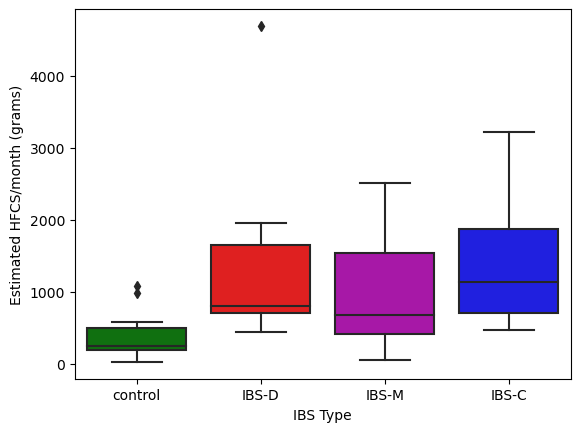

In [17]:
ax = sns.boxplot(x=metadata["IBS Type"],
                y=metadata["TOTAL EST HFCS (per month in grams)"],
                order=["control","IBS-D","IBS-M","IBS-C"],
                palette=["g","r","m","b"])

ax.set_ylabel("Estimated HFCS/month (grams)")
plt.savefig("Figures/HFCS-IBStype.pdf")
plt.show()

In [12]:
import scipy.stats as stats

stats.f_oneway(metadata.loc[metadata["IBS Type"]=="control", "TOTAL EST HFCS (per month in grams)"],
              metadata.loc[metadata["IBS Type"]=="IBS-D", "TOTAL EST HFCS (per month in grams)"],
              metadata.loc[metadata["IBS Type"]=="IBS-M", "TOTAL EST HFCS (per month in grams)"],
              metadata.loc[metadata["IBS Type"]=="IBS-C", "TOTAL EST HFCS (per month in grams)"])


F_onewayResult(statistic=3.3987525103103127, pvalue=0.026579924343047793)

In [15]:
from scikit_posthocs import posthoc_dunn

In [17]:
posthoc_dunn(metadata,val_col="TOTAL EST HFCS (per month in grams)",group_col="IBS Type")


,IBS-C,IBS-D,IBS-M,control
IBS-C,1.000000,0.759260,0.133709,0.000661
IBS-D,0.759260,1.000000,0.240472,0.002034
IBS-M,0.133709,0.240472,1.000000,0.038778
control,0.000661,0.002034,0.038778,1.000000
